In [52]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from ISLP.models import (ModelSpec as MS,
                         summarize)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [5]:
# Creating a simulated dataset
rng = np.random.default_rng(1)
x = rng.normal(size = 100)
y = x - 2 * x ** 2 + rng.normal(size = 100)

Part A : In this dataset, what is n and what is p?  Write out the model used to generate the data in equation form.

In this dataset n is 100 (the number of observations), and p is 2 (the variables x and x^2 are both used as predictors)

Y = x - 2x^2 + error term

<function matplotlib.pyplot.show(close=None, block=None)>

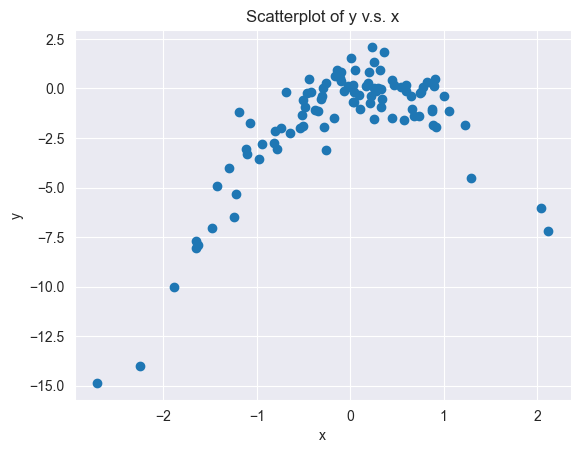

In [11]:
# Creating a scatterplot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of y v.s. x')
plt.grid(True)
plt.show

Part B : Create a scatterplot of x v.s. y.  Comment on what you find.

The data has a fairly normal bell shaped distribution.  The y-values tend to increase as x increases up to around 0, after that as x increases y tends to decrease.

In [21]:
# Sets a random seed for reproducibility
new_rng = np.random.default_rng(174201)

# Creates a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Add an intercept column to the predictor
X = sm.add_constant(df['x'])

# Fits the ordinary least squares (OLS) model
model = sm.OLS(df['y'], X).fit()

# Output the results
summarize(model)

,coef,std err,t,P>|t|
const,-1.4650,0.247,-5.937,0.0
x,1.9494,0.289,6.752,0.0


In [25]:
# Sets up K-Fold CV with 100 splits, shuffle for randomness, and set a random state for reproducibility
kf = KFold(n_splits = 100, shuffle = True, random_state = 174201)

# Create blank list for test MSE results
mse_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit an ordinary least squares (OLS) model on the training data
    model = sm.OLS(y_train, X_train)
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Compute and store the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

KeyError: "None of [Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,\n       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,\n       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,\n       54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,\n       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,\n       91, 92, 93, 94, 95, 96, 97, 98, 99],\n      dtype='int64')] are in the [columns]"

In [55]:
# Reads in the Weekly dataset
weekly = pd.read_csv('/Users/Camer/Downloads/Spring 2025 Classes/Stat 411/Stat 411 Book/All CSV Files/Weekly.csv')

In [36]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [38]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [40]:
weekly.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up
1088,2010,1.034,0.283,1.281,2.969,-0.861,2.707105,0.069,Up


In [41]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [56]:
# Creates a DataFrame with the predictors we will be using
X = pd.DataFrame({'intercept': np.ones(weekly.shape[0]),
                  'Volume': weekly['Volume'],
                  'Lag1': weekly['Lag1'],
                  'Lag2': weekly['Lag2'],
                  'Year': weekly['Year']})

# Creates our response variable and sets it to the variable 'Today' in the weekly dataset
y = weekly['Today']

# Creates a model using Ordinary Least Squares (OLS) Regression and fits it
model = sm.OLS(y, X).fit()

# Outputs important information about the model we just built.
summarize(model)

,coef,std err,t,P>|t|
intercept,13.5193,43.826,0.308,0.758
Volume,-0.0266,0.079,-0.337,0.736
Lag1,-0.0730,0.030,-2.398,0.017
Lag2,0.0515,0.031,1.687,0.092
Year,-0.0067,0.022,-0.303,0.762


The resulting fitted model is Y = 13.5193 - 0.0266(Volume) - 0.073(Lag1) - 0.0515(Lag2) - 0.0067(Year)

In [57]:
# Creates the function we use to estimate the test MSE
def evalMSE(terms,
           response,
           train,
           test):

    mm = MS(terms)
    X_train = mm.fit_transform(train)
    y_train = train[response]

    X_test = mm.transform(test)
    y_test = test[response]

    results = sm.OLS(y_train, X_train).fit()
    test_pred = results.predict(X_test)

    return np.mean((y_test - test_pred)**2)

In [58]:
# Splits our data into two groups with an 80/20 split, with more variables in the training dataset.
weekly_train, weekly_test = train_test_split(weekly,
                                             test_size = 218,
                                             random_state = 174201)

# Estimates the test MSE
test_MSE = evalMSE(['Volume', 'Lag1', 'Lag2', 'Year'],
                   'Today',
                   weekly_train,
                   weekly_test)

test_MSE

np.float64(7.263093680423689)

Our estimate of the test MSE with a validation set made from an 80/20 split is 7.26.

In [53]:
# Initialize the model
model = LinearRegression()

# Perform 5-fold cross-validation using negative MSE as the scoring metric
scores = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_squared_error')

# Convert negative MSE to positive values
mse_scores = -scores

print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))


MSE scores for each fold: [ 2.68430444  2.82511767  8.63587461  3.07355425 10.84609048]
Average MSE: 5.61298828961594


Our average MSE was lower than before when we estimate the test MSE using K Fold cross validation where k = 5.

In [54]:
SqErrs = np.zeros(1089)

# The predictor variables we will use
design = MS(['Lag1', 'Lag2', 'Volume', 'Year'])

# Creates a for loop so we iterate through every value in the dataset and perform LOOCV.
for i in range(1089):

    # Creates the predictor training dataset from every other observation but i.
    X_train = design.fit_transform(weekly.drop([i]))

    # Creates the response training dataset from every other observation but i.
    y_train = weekly['Today'].drop([i])

    # Creates our model using Ordinary Least Squares (OLS) Regression
    model = sm.OLS(y_train, X_train)

    # Fits our results
    results = model.fit()

    # Creates our predictor test training set with only the observation i in it.
    X_test = design.transform(weekly.iloc[[i]])

    # Creates our response test training set with only the observation i in it.
    y_test = weekly['Today'].iloc[i]

    # Gets our prediction
    test_pred = results.predict(X_test)

    # Calculates the squared difference between the actual result and our estimate
    a = (y_test - test_pred)**2

    # Sets the ith value for SqErrs to a for the ith iteration
    SqErrs[i] = float(a.iloc[0])

# Calculates the mean Squared Error over all of our estimates
np.mean(SqErrs)

np.float64(5.6042237514063915)